In [1]:
import pandas as pd
df = pd.read_csv('04_combine_all.tsv', sep='\t')

In [2]:
df.groupby('dept').size()

dept
STT_AB     74569
STT_CS     43806
STT_MV    241573
STT_NS     70768
STT_TT    361843
dtype: int64

In [3]:
df['char_len'] = df['uni'].str.len()

In [4]:
df['char_len'].describe()

count    792559.000000
mean         67.046332
std          49.289647
min           6.000000
25%          29.000000
50%          54.000000
75%          94.000000
max         393.000000
Name: char_len, dtype: float64

<Axes: >

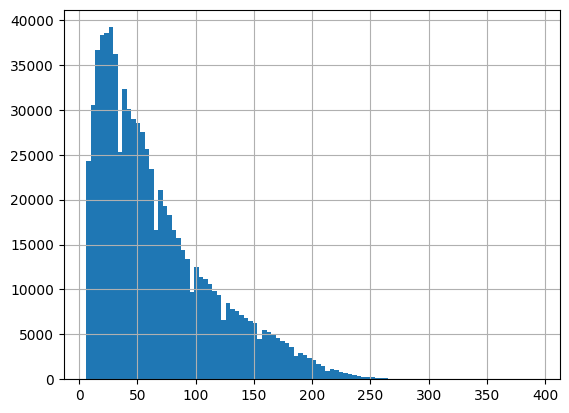

In [5]:
df['char_len'].hist(bins=100)

<Axes: >

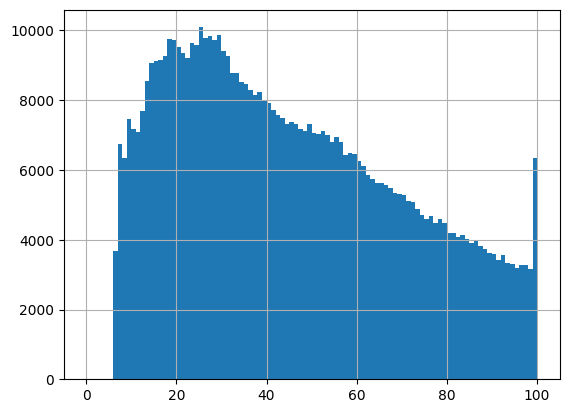

In [6]:
df['char_len'].hist(bins=100, range=(0, 100))

In [7]:
df = df[(df['char_len'] < 80) & (df['char_len'] > 15)]

In [9]:
df.groupby('dept').size()

dept
STT_AB     43897
STT_CS     18215
STT_MV    127287
STT_NS     16800
STT_TT    261561
dtype: int64

In [10]:
depts = df['dept'].unique()

In [11]:
benchmarks = []
for dept in depts:
    print(dept)
    df_dept = df[df['dept'] == dept]
    df_dept = df_dept.sort_values('grade', ascending=False)
    df_dept = df_dept[0:1000]
    benchmarks.append(df_dept)

STT_AB
STT_NS
STT_TT
STT_CS
STT_MV


In [12]:
benchmarks = pd.concat(benchmarks)

In [13]:
benchmarks.head()

,file_name,uni,url,dept,grade,wylie,char_len,audio_len
259944,STT_AB00075_0020_142095_to_143496,རྒན་རབས་ལ་གུས་ཞབས་ཆེ་ཞིང་།,https://d38pmlk0v88drf.cloudfront.net/wav/STT_...,STT_AB,3,rgan rabs la gus zhabs che zhing /_,27,1.401
267295,STT_AB00066_0041_195100_to_196585,རྒྱུ་མཚན་ཤིན་ཏུ་མང་པོ་ཡོད་དེ།,https://d38pmlk0v88drf.cloudfront.net/wav/STT_...,STT_AB,3,rgyu mtshan shin tu mang po yod de/_,30,1.485
294719,STT_AB00189_0045_166459_to_172448,དེ་ལྟར་ཡོངས་གྲགས་བྱས་ནས་གསུངས་པའི་ཐེག་དམན་ནམ་ཉ...,https://d38pmlk0v88drf.cloudfront.net/wav/STT_...,STT_AB,3,de ltar yongs grags byas nas gsungs pa'i theg ...,65,5.989
507321,STT_AB00208_0075_398080_to_399889,བ་ཕྱུགས་སྟོང་ཕྲག་དེའི་འོ་མ་བཞོས་ནས་,https://d38pmlk0v88drf.cloudfront.net/wav/STT_...,STT_AB,3,ba phyugs stong phrag de'i 'o ma bzhos nas _,36,1.809
397590,STT_AB00172_2108_7203899_to_7208813,མི་ཚངས་པར་སྤྱོད་དོ་ཞེས་པ་ལྟ་བུ་དམིགས་ཀྱིས་ཕྱེ་...,https://d38pmlk0v88drf.cloudfront.net/wav/STT_...,STT_AB,3,mi tshangs par spyod do zhes pa lta bu dmigs k...,61,4.914


In [14]:
benchmarks.groupby('dept').size()

dept
STT_AB    1000
STT_CS    1000
STT_MV    1000
STT_NS    1000
STT_TT    1000
dtype: int64

In [15]:
sample = 3
for dept in depts:
    print(dept)
    df_dept = benchmarks[benchmarks['dept'] == dept]
    df_dept = df_dept.sample(frac=1)
    for i in range(0, sample):
        print(df_dept.iloc[i]['uni'], df_dept.iloc[i]['url'])

STT_AB
བསྐལ་པ་དྲུག་ཅུར་ཤེས་རབ་ཀྱི་ཕ་རོལ་ཏུ་ཕྱིན་པ་ཡང་དག་པར་བསྒྲུབས་ན།  https://d38pmlk0v88drf.cloudfront.net/wav/STT_AB00172_2461_8878131_to_8881902.wav
གཏོང་བ་ལ་གོམས་པས་  https://d38pmlk0v88drf.cloudfront.net/wav/STT_AB00173_0171_713609_to_715093.wav
སྙིང་རྗེའི་བསམ་པ་མ་དག་པར།། ལུས་ནི་གཏང་བར་མི་བྱ་སྟེ།  https://d38pmlk0v88drf.cloudfront.net/wav/STT_AB00173_0734_3175452_to_3179360.wav
STT_NS
ད་ལྟ་རྒྱུ་ཆ་དེ་ཚོ་ཚང་མ་མཁོ་སྒྲུབ་བྱེད་དགོས་མ་རེད། ར་འོ་དེ་གི  https://d38pmlk0v88drf.cloudfront.net/wav/STT_NS0178_0036_300180_to_303437.wav
དེ་འདྲའི་འདྲ་བོ་བཤད་ན་ཡག་པོ་འདུག་ཀ་རེད་ཨ་ཡ  https://d38pmlk0v88drf.cloudfront.net/wav/STT_NS0199_0049_402099_to_404286.wav
གཅིག་པ་རེད་ཡོད་ཨ་ཨུ་ང་ཚོ་བུ་སློབ་གྲྭ་ཅིག་ཡོད་  https://d38pmlk0v88drf.cloudfront.net/wav/STT_NS0175_0067_498664_to_501145.wav
STT_TT
བདག་མེད་སྐོར་གསུང་གསུང་གི་  https://d38pmlk0v88drf.cloudfront.net/wav/STT_TT00034_09367.550-09368.450.wav
ཨེ་ག་རེ་ཟ་དགོས་  https://d38pmlk0v88drf.cloudfront.net/wav/STT_TT00035_02348.400-02349.400.wav
ཁོ་ཕ་གི་

In [16]:
def parse_cs_file_name(code):
    
    try:
        # Split the code into parts
        parts = code.split('-')

        # Decode each part of the code
        
        data_type = {'X': 'non-designated', 'D': 'story-telling', 'L':'conversation'}.get(parts[1], 'Unknown')
        birth_year = parts[2][:4]
        gender = {'P': 'male', 'M': 'female', 'X': 'other'}.get(parts[3][:1], 'Unknown')
        location = {'D': 'Dharamsala', 'S': 'South India', 'L': 'Ladakh', 'N': 'Nepal'}.get(parts[4][:1], 'Unknown')
        education_type = parts[5][0]
        education_years = parts[5][1:3]
        grade_level = parts[6][:1]
        school_code = parts[7][:1]

        # Create a dictionary with the decoded values
        decoded = {
            'data_type': data_type,
            'birth_year': int(birth_year),
            'age': 2023 - int(birth_year),
            'gender': gender,
            'location': location,
            'education_type': education_type,
            'education_years': int(education_years),
            'grade_level': int(grade_level),
            'school_code': school_code
        }
    except:
        print(f'Error decoding {code}')
        return {}
    return decoded

# Example usage
codes = [
    'STT_CS-D-2016-M-D-B04-1-R-06_0017_147090_to_156979',
    'STT_CS-X-2014-M-D-B02-4-R-01_0110_1035711_to_1037787',
    'STT_CS-L-2014/2014-P/P-D/D-B03/B06-5/5-R/R-01_0129_1106637_to_1112914.mp3',
]

for code in codes:
    print(parse_cs_file_name(code))


{'data_type': 'story-telling', 'birth_year': 2016, 'age': 7, 'gender': 'female', 'location': 'Dharamsala', 'education_type': 'B', 'education_years': 4, 'grade_level': 1, 'school_code': 'R'}
{'data_type': 'non-designated', 'birth_year': 2014, 'age': 9, 'gender': 'female', 'location': 'Dharamsala', 'education_type': 'B', 'education_years': 2, 'grade_level': 4, 'school_code': 'R'}
{'data_type': 'conversation', 'birth_year': 2014, 'age': 9, 'gender': 'male', 'location': 'Dharamsala', 'education_type': 'B', 'education_years': 3, 'grade_level': 5, 'school_code': 'R'}


In [17]:
benchmarks_cs = benchmarks[benchmarks['dept'] == 'STT_CS']

In [18]:
benchmarks_cs_parsed = benchmarks_cs['file_name'].apply(lambda x: pd.Series(parse_cs_file_name(x)))
benchmarks_cs = pd.concat([benchmarks_cs, benchmarks_cs_parsed], axis=1)

In [19]:
benchmarks_cs.groupby('education_years').size()

education_years
1    245
2    269
3    118
4     69
5    114
6      1
7     90
8     62
9     32
dtype: int64

In [20]:
benchmarks_cs.groupby('school_code').size()

school_code
B      1
R    895
T    104
dtype: int64

In [21]:
df_cs = df[df['dept'] == 'STT_CS']

In [22]:
df_cs = df_cs.sort_values('grade', ascending=False)

In [23]:
df_cs_parsed = df_cs['file_name'].apply(lambda x: pd.Series(parse_cs_file_name(x)))
df_cs = pd.concat([df_cs, df_cs_parsed], axis=1)

Error decoding STT_CS-L-2018_2018_M_M-D_D-B05_B05-3_3-R_R-01B_0153_1201305_to_1203600
Error decoding STT_CS-L-2018_2018_M_M-D_D-B05_B05-3_3-R_R-01B_0154_1214873_to_1219227
Error decoding STT_CS-L-2018_2018_M_M-D_D-B05_B05-3_3-R_R-01B_0155_1221049_to_1224492
Error decoding STT_CS-L-2018_2018_M_M-D_D-B05_B05-3_3-R_R-01B_0150_1172618_to_1175234
Error decoding STT_CS-L-2018_2018_M_M-D_D-B05_B05-3_3-R_R-01B_0151_1177731_to_1186995
Error decoding STT_CS-L-2018_2018_M_M-D_D-B05_B05-3_3-R_R-01B_0152_1193847_to_1197002
Error decoding STT_CS-L-2018_2018_M_M-D_D-B05_B05-3_3-R_R-01B_0147_1149499_to_1152199
Error decoding STT_CS-L-2018_2018_M_M-D_D-B05_B05-3_3-R_R-01B_0148_1160907_to_1167555
Error decoding STT_CS-L-2018_2018_M_M-D_D-B05_B05-3_3-R_R-01B_0092_698160_to_700489
Error decoding STT_CS-L-2018_2018_M_M-D_D-B05_B05-3_3-R_R-01B_0093_700523_to_705670
Error decoding STT_CS-L-2018_2018_M_M-D_D-B05_B05-3_3-R_R-01B_0144_1124355_to_1130751
Error decoding STT_CS-L-2018_2018_M_M-D_D-B05_B05-3_3-R_R-

In [24]:
df_cs.groupby('education_years').size()

education_years
0.0       9
1.0    2704
2.0    3678
3.0    2686
4.0    2966
5.0    2345
6.0    1503
7.0     747
8.0     681
9.0     414
dtype: int64

In [25]:
df_cs.groupby('school_code').size()

school_code
0        7
B       48
K       18
R    16304
T      649
Y      654
r       53
dtype: int64

In [26]:
benchmarks_cs = pd.concat([benchmarks_cs, df_cs[df_cs['education_years'] == 6][:100]])
benchmarks_cs = pd.concat([benchmarks_cs, df_cs[df_cs['education_years'] == 9][:60]])

In [27]:
benchmarks_cs.groupby('education_years').size()

education_years
1.0    245
2.0    269
3.0    118
4.0     69
5.0    114
6.0    101
7.0     90
8.0     62
9.0     92
dtype: int64

In [28]:
missing_school_codes = ['0','B','K','Y','r']

In [29]:
benchmarks_cs = pd.concat([benchmarks_cs, df_cs[df_cs['school_code'] == '0'][:7]])
benchmarks_cs = pd.concat([benchmarks_cs, df_cs[df_cs['school_code'] == 'B'][:40]])
benchmarks_cs = pd.concat([benchmarks_cs, df_cs[df_cs['school_code'] == 'K'][:10]])
benchmarks_cs = pd.concat([benchmarks_cs, df_cs[df_cs['school_code'] == 'Y'][:100]])
benchmarks_cs = pd.concat([benchmarks_cs, df_cs[df_cs['school_code'] == 'r'][:50]])

In [30]:
benchmarks_cs.groupby('school_code').size()

school_code
0       7
B      41
K      10
R    1055
T     104
Y     100
r      50
dtype: int64

In [31]:
benchmarks = pd.concat([benchmarks[benchmarks['dept'] != 'STT_CS'], benchmarks_cs])

In [32]:
benchmarks.shape

(5367, 17)

In [33]:
benchmarks.groupby('dept').size()

dept
STT_AB    1000
STT_CS    1367
STT_MV    1000
STT_NS    1000
STT_TT    1000
dtype: int64

In [35]:
benchmarks = benchmarks[['file_name', 'uni', 'wylie', 'url', 'dept', 'grade', 'char_len']]

In [36]:
benchmarks_mv = df[df['dept'] == 'STT_MV']

In [37]:
dir = '/home/monlamai/Downloads/'

mv_existing = ['test.tsv', 'train.tsv', 'validation.tsv']

mv_existing = [pd.read_csv(dir+f, sep='\t') for f in mv_existing]
mv_existing = pd.concat(mv_existing)

In [38]:
mv_existing.head()

,file_name,uni,wylie,url,dept
0,STT_MV0090_0159_1097722_to_1105009.wav,འུ་ཙི། འདིའི་ཁོར་ཡུག་དེ་འདྲས་ཡག་ག་ལ། རང་གིས་ག་...,'u tsi/_'di'i khor yug de 'dras yag ga la/_ran...,https://d38pmlk0v88drf.cloudfront.net/mv_wav/S...,STT_MV
1,STT_MV0230_0214_1355003_to_1357646.wav,ད་ཁྱེད་རང་ཤོང་ས་མ་རེད།,da khyed rang shong sa ma red/_,https://d38pmlk0v88drf.cloudfront.net/mv_wav/S...,STT_MV
2,STT_MV0320_0069_558399_to_562888.wav,ད་གེ། ད་གེ་ཡོད། རོགས་པ་མདུན་ལ་ཏོག་ཙི། སྐད་ཆ་རི...,da ge/_da ge yod/_rogs pa mdun la tog tsi/_ska...,https://d38pmlk0v88drf.cloudfront.net/mv_wav/S...,STT_MV
3,STT_MV0029_0105_977753_to_985770.wav,ཁྱེད་རང་གིས་ཆེད་མངགས་མི་བཏང་བྱས་ང་ཁྱེད་རང་ནང་ལ...,khyed rang gis ched mngags mi btang byas nga k...,https://d38pmlk0v88drf.cloudfront.net/mv_wav/S...,STT_MV
4,STT_MV0012_0213_1904651_to_1913374.wav,རྒན་ལགས། ཡ་རྒན་ལགས།,rgan lags/_ya rgan lags/_,https://d38pmlk0v88drf.cloudfront.net/mv_wav/S...,STT_MV


In [39]:
mv_existing['file_name'] = mv_existing['file_name'].str.replace('.wav', '')

In [40]:
benchmarks_mv = benchmarks_mv[benchmarks_mv['file_name'].isin(mv_existing['file_name'])]

In [41]:
benchmarks_mv = benchmarks_mv[:1000]

In [42]:
benchmarks_mv.shape

(1000, 8)

In [43]:
benchmarks = pd.concat([benchmarks[benchmarks['dept'] != 'STT_MV'], benchmarks_mv])

In [44]:
benchmarks.head()

,file_name,uni,wylie,url,dept,grade,char_len,audio_len
259944,STT_AB00075_0020_142095_to_143496,རྒན་རབས་ལ་གུས་ཞབས་ཆེ་ཞིང་།,rgan rabs la gus zhabs che zhing /_,https://d38pmlk0v88drf.cloudfront.net/wav/STT_...,STT_AB,3,27,NaN
267295,STT_AB00066_0041_195100_to_196585,རྒྱུ་མཚན་ཤིན་ཏུ་མང་པོ་ཡོད་དེ།,rgyu mtshan shin tu mang po yod de/_,https://d38pmlk0v88drf.cloudfront.net/wav/STT_...,STT_AB,3,30,NaN
294719,STT_AB00189_0045_166459_to_172448,དེ་ལྟར་ཡོངས་གྲགས་བྱས་ནས་གསུངས་པའི་ཐེག་དམན་ནམ་ཉ...,de ltar yongs grags byas nas gsungs pa'i theg ...,https://d38pmlk0v88drf.cloudfront.net/wav/STT_...,STT_AB,3,65,NaN
507321,STT_AB00208_0075_398080_to_399889,བ་ཕྱུགས་སྟོང་ཕྲག་དེའི་འོ་མ་བཞོས་ནས་,ba phyugs stong phrag de'i 'o ma bzhos nas _,https://d38pmlk0v88drf.cloudfront.net/wav/STT_...,STT_AB,3,36,NaN
397590,STT_AB00172_2108_7203899_to_7208813,མི་ཚངས་པར་སྤྱོད་དོ་ཞེས་པ་ལྟ་བུ་དམིགས་ཀྱིས་ཕྱེ་...,mi tshangs par spyod do zhes pa lta bu dmigs k...,https://d38pmlk0v88drf.cloudfront.net/wav/STT_...,STT_AB,3,61,NaN


In [45]:
benchmarks.groupby('dept').size()

dept
STT_AB    1000
STT_CS    1367
STT_MV    1000
STT_NS    1000
STT_TT    1000
dtype: int64

In [46]:
benchmarks.to_csv('05_benchmarks.tsv', sep='\t', index=False)